# Task # 3 - To Explore Unsupervised Machine Learning

## From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.


### Importing libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import seaborn as sns
sns.set()


### Data

In [10]:
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns = iris.feature_names)

### Exploratory Data Analysis

In [11]:
data.shape

(150, 4)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [13]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


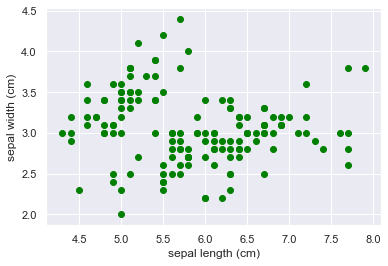

In [22]:
## Visualize the relationship between features

plt.scatter(data['sepal length (cm)'],data['sepal width (cm)'],c='green')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

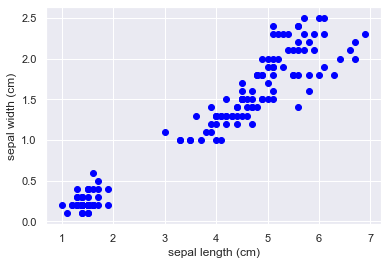

In [25]:
plt.scatter(iris_data['petal length (cm)'],iris_data['petal width (cm)'],c='blue')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

<Figure size 1440x1440 with 0 Axes>

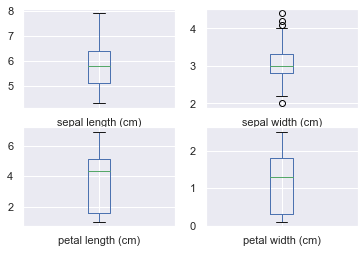

In [27]:
plt.figure(figsize=(20,20))
sns.set_style('darkgrid')
data.plot(kind='box',layout=(2,2),sharex=False,sharey=False,subplots=True)
plt.show()

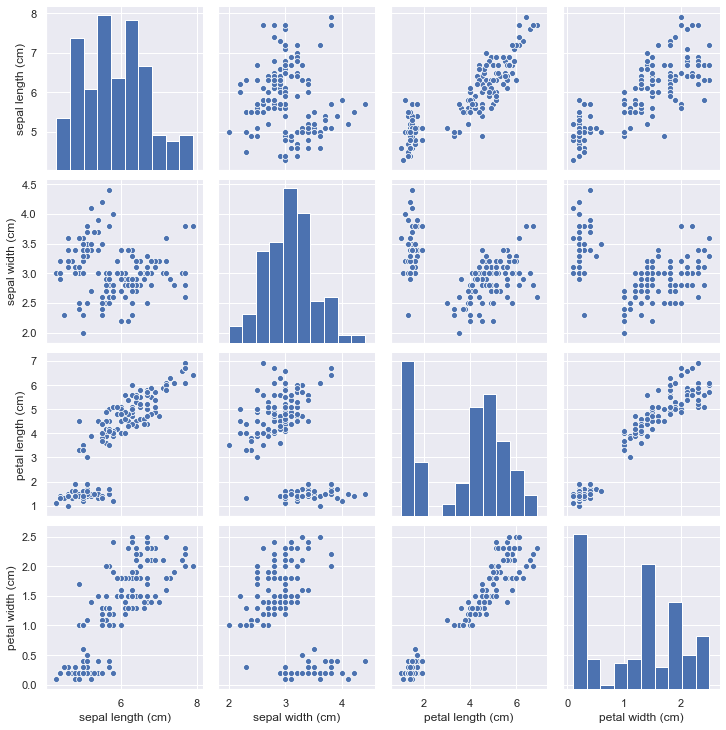

In [29]:
sns.pairplot(data ,palette='viridis')

### Elbow method to find k

In [30]:
wcss=[]
k_range=10
for i in range(1,k_range):
    k=KMeans(i)
    k.fit(data)
    w=k.inertia_
    wcss.append(w)
wcss

[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.25600931571815,
 46.44618205128205,
 39.03998724608725,
 34.465130093590616,
 30.32581102231103,
 27.813029418902993]

Text(0.5, 1.0, 'The elbow method')

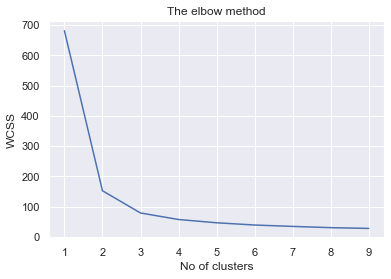

In [31]:
clusters=range(1,k_range)
plt.plot(clusters,wcss)
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.title('The elbow method')

In [34]:
# K= 2 clusters

kmeans_2=KMeans(2)
kmeans_2.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [35]:
iris_pred_2=data.copy()
iris_pred_2['predicted']=kmeans_2.fit_predict(data)

Text(0.5, 1.0, 'K=2 Sepal length vs sepal width')

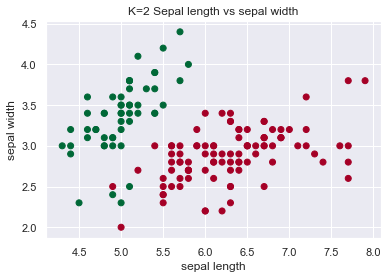

In [36]:
# Visualizing clusters according to predicted values

plt.scatter(iris_pred_2['sepal length (cm)'], iris_pred_2['sepal width (cm)'], c=iris_pred_2 ['predicted'], cmap = 'RdYlGn')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('K=2 Sepal length vs sepal width')

Text(0.5, 1.0, 'K=2 petal length vs petal width')

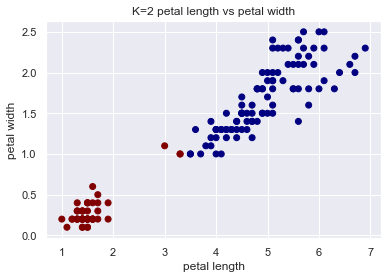

In [37]:
plt.scatter(iris_pred_2['petal length (cm)'], iris_pred_2['petal width (cm)'], c=iris_pred_2 ['predicted'], cmap = 'jet')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('K=2 petal length vs petal width')

In [38]:
# K=3 clusters

kmeans_3=KMeans(3)
kmeans_3.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [39]:
iris_pred_3=data.copy()
iris_pred_3['predicted']=kmeans_3.fit_predict(data)

Text(0.5, 1.0, 'K=3 Sepal length vs sepal width')

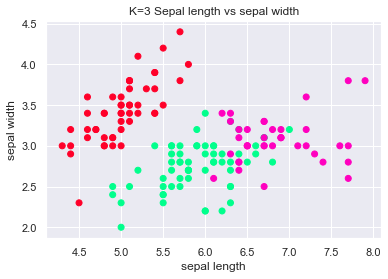

In [40]:
# Visualizing clusters according to predicted values

plt.scatter(iris_pred_3['sepal length (cm)'], iris_pred_3['sepal width (cm)'], c=iris_pred_3 ['predicted'], cmap = 'gist_rainbow')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('K=3 Sepal length vs sepal width')

Text(0.5, 1.0, 'K=3 petal length vs petal width')

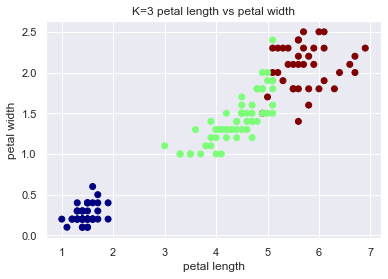

In [41]:
plt.scatter(iris_pred_3['petal length (cm)'], iris_pred_3['petal width (cm)'], c=iris_pred_3 ['predicted'], cmap = 'jet')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('K=3 petal length vs petal width')

Text(0.5, 1.0, 'Sepal length vs sepal width')

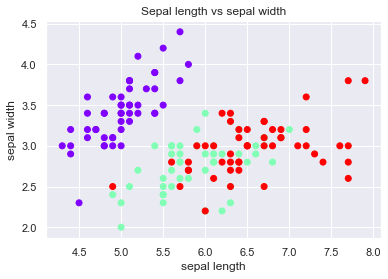

In [42]:
# Visualizing clusters for true label values

plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'], c=iris.target, cmap = 'rainbow')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Sepal length vs sepal width')

Text(0.5, 1.0, 'Petal length vs petal width')

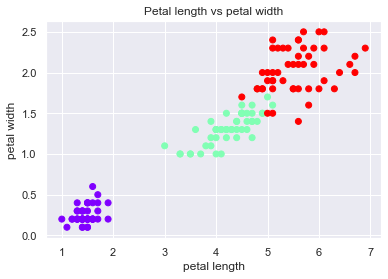

In [43]:
plt.scatter(data['petal length (cm)'], data['petal width (cm)'], c=iris.target, cmap = 'rainbow')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('Petal length vs petal width')